# Modelos 5
## Dados sequenciais

__Objetivo__: Diversos dados de interesse científico são sequenciais, isto é, existe o conceito de ordem/
sequência nos dados. Por exemplo: os dados de pinguins não apresentam ordem, você pode embaralhar
os exemplos e não terá problema algum; já os dados de número de infectados por COVID‑19 são dados
sequenciais pois existe uma ordem temporal entre os dados. Sua tarefa neste exercício é aprender sobre
como tratar dados sequenciais utilizando o módulo sktime. Escolha um conjunto de dados sequenciais
de seu interesse e treine um algoritmo de aprendizado de máquina próprio para dados sequenciais.
Observe que existe uma estratégia de split de treino e teste própria para dados sequenciais (o sktime
faz isso)

**Disciplina**: Aprendizado de Máquina

**Professor**: Daniel R. Cassar

**Alunos**: Joaquim J. F. Fonseca e Matheus Pereira Velloso da Silvera

**Ilum Escola de Ciências**

# Modelo com dados sequênciais

### Importando o dataset

Primeiro, vamos importar o dataset Arline do sktime, que conta o número de passageiros da airline ao longo de diversos meses entre 1949 e 1961. Uma forma de vizualisar esse dataset é pela função plot_series do sktime.utils.plotting, que mostra um gráfico dos valores ao longo do tempo

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

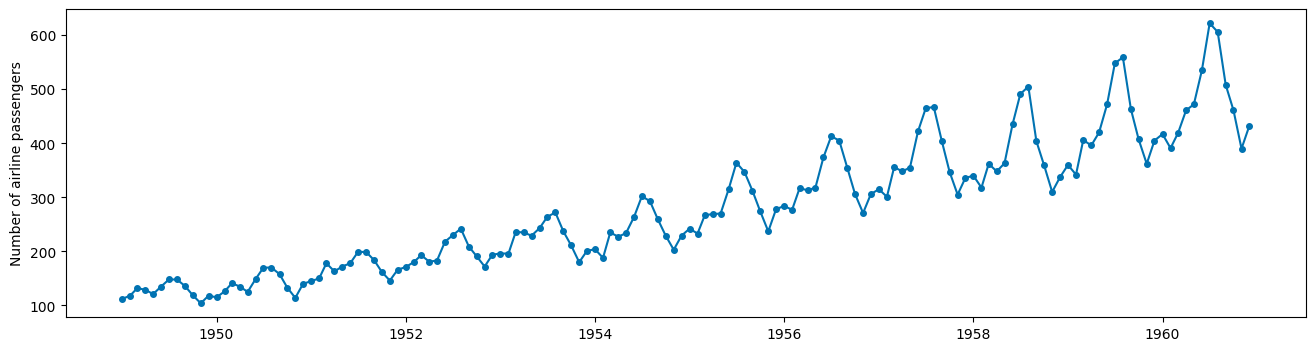

In [1]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

df = load_airline()
plot_series(df)


### Spliting dos Dados

Agora, precisamos separar os dados para teste e para treino. Para isso, usamos a função temporal_train_test_split. Para esse modelo usaremos um teste com 10% dos dados. Em modelos com progressão temporal, o test split sempre vai remover os dados mais novos para o teste.

Também é necessário criar um forecasting horizon (ou um horizonte de previsão), que se trata de quais pontos a partir do ultimo valor dos dados de treinoserão previstos pelo modelo. Para isso, criaremos uma lista de mesmo tamanho que os valores de teste (a fins de comparação) iniciando em 1.

In [2]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_treino, y_teste = temporal_train_test_split(df, test_size=0.1)

fh = list(range(1, len(y_teste)+1))


### Modelo baseline

Agora, criamos um modelo baseline para termos como base na análise do desempenho do modelo por meio da função NaiveForecaster. Para o caso de series com progressão temporal, é comum usar como baseline o ultimo valor obtido, portanto usaremos  strategy="last"

In [3]:
from sktime.forecasting.naive import NaiveForecaster

baseline = NaiveForecaster(strategy="last")

Agora, fazemos o treinamento do modelo baseline com a função fit e fazemos a previsão utilizando a função predict. Com isso, podemos fazer o gráfico do modelo da mesma forma que fizemos anteriormente e calcular o MSE do baseline

MSE = 5683.666666666667
MAPE = 0.13071470008919078


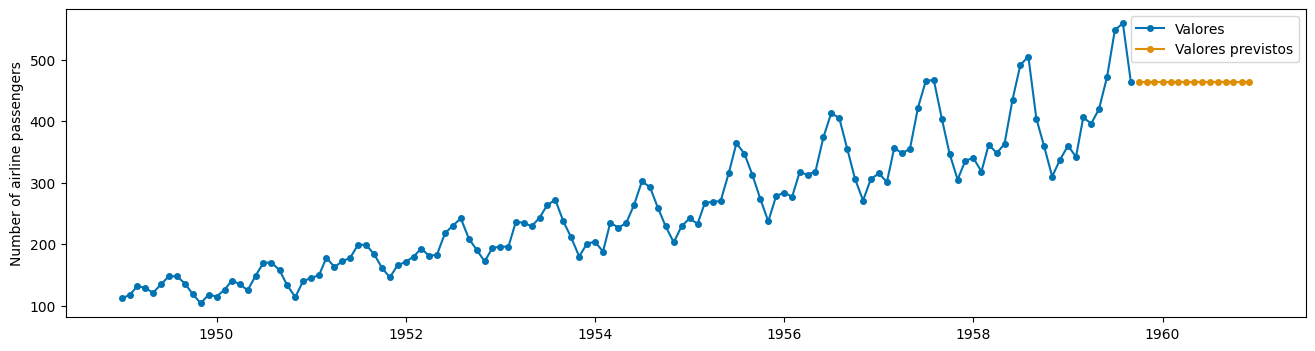

In [14]:
from sktime.performance_metrics.forecasting import mean_squared_error, mean_absolute_percentage_error

baseline.fit(y_treino)

y_baseline = baseline.predict(fh)

plot_series(y_treino, y_baseline, labels=["Valores", "Valores previstos"])

mse = mean_squared_error(y_teste, y_baseline)
print(f"MSE = {mse}")

mape = mean_absolute_percentage_error(y_teste, y_baseline)
print(f"MAPE = {mape}")

### Modelo Theta Forecaster

Com o baseline feito, podemos criar um modelo com base em algum algoritimo adequado para dados com progressão temporal. Para esse exercício foi escolhido o algorítimo Theta Forecaster.

Theta Forecaster é um modelo de previsão que decompões a série em duas theta lines, a primeira sendo uma linearização da série, representando a tendência a longo prazo, e a segunda uma linha curva obtida por uma suavização exponencial simples (SES), indicando as variações a curto prazo. Para realizar uma predição, o algorítimo calcula a média as duas theta lines. Abaixo está a representação visual desssa decomposição

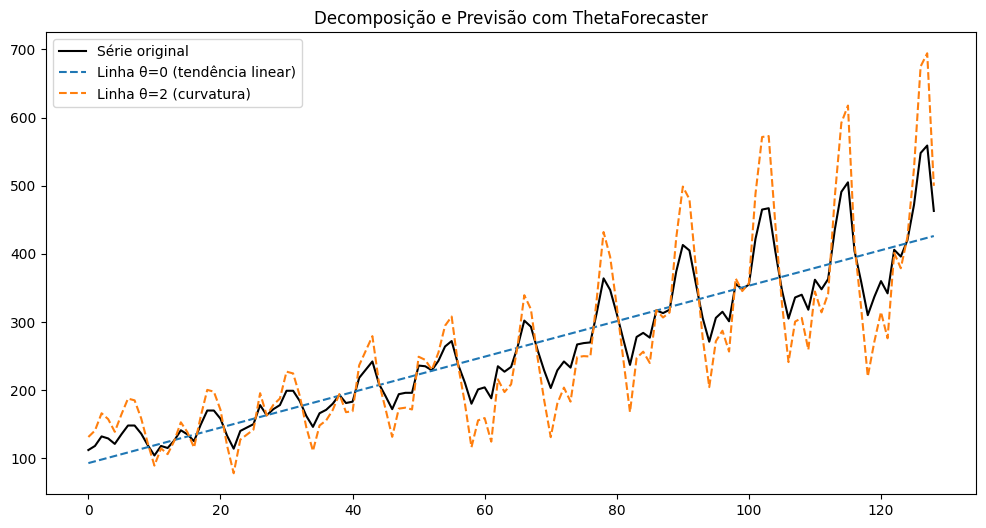

In [5]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(len(y_treino))

coef = np.polyfit(t, y_treino.values, deg=1)
trend = np.polyval(coef, t)

theta0 = trend
theta2 = 2*y_treino.values - trend

plt.figure(figsize=(12,6))
plt.plot(t, y_treino, label="Série original", color="black")
plt.plot(t, theta0, "--", label="Linha θ=0 (tendência linear)")
plt.plot(t, theta2, "--", label="Linha θ=2 (curvatura)")

plt.title("Decomposição e Previsão com ThetaForecaster")
plt.legend()
plt.show()



Abaixo está a implementação do modelo de previsão Theta Forcaster em python, juntamente com a plotagem do modelo e seu MSE

MSE = 1018.333302811924
MAPE = 0.05275644743775576


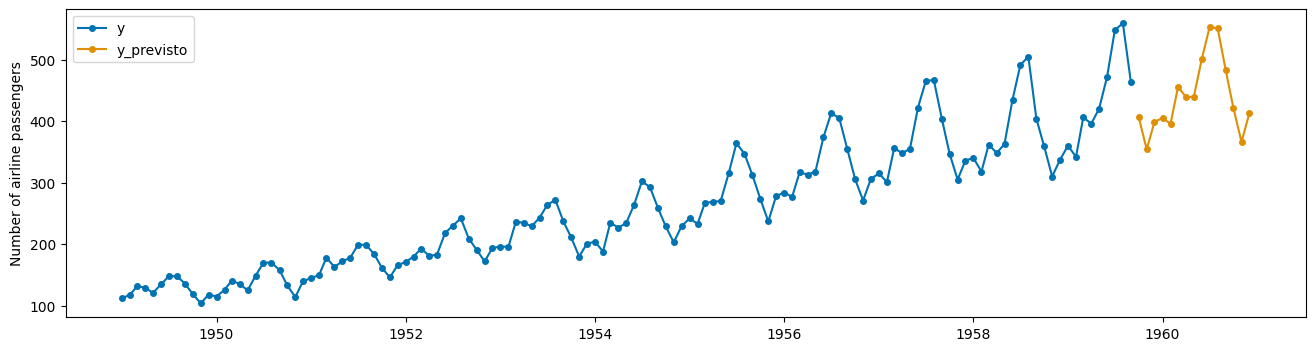

In [17]:
from sktime.forecasting.theta import ThetaForecaster

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_treino, fh=fh)
y_previsto = forecaster.predict(fh)

plot_series(y_treino, y_previsto, labels=["y", "y_previsto"])

mse = mean_squared_error(y_teste, y_previsto)
print(f"MSE = {mse}")

mape = mean_absolute_percentage_error(y_teste, y_previsto)
print(f"MAPE = {mape}")


Segue abaixo também uma comparação entre os valores previstos e reais

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

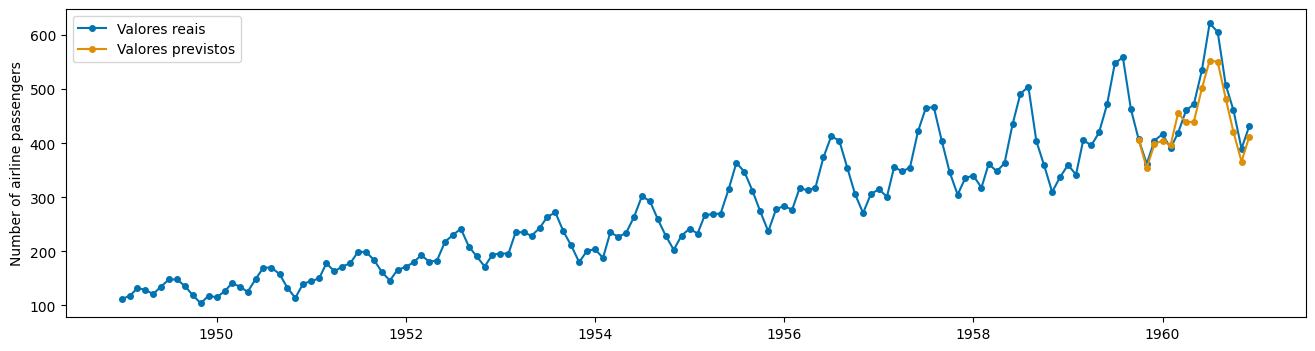

In [7]:
plot_series(
    df, y_previsto, labels=["Valores reais", "Valores previstos"]
)

# Discussões

O módulo sktime foi eficiente na abordagem de séries contedo progressão temporal. O modelo Theta Forecaster, em específico, se mostrou com uma eficiência satisfatória e superior ao baseline. Enquanto o baseline apresentou MSE de 5684 e MAPE de 13%, o Theta Forecaster teve um MSE de 1018 e MAPE de 5%

# Conclusão

Portanto, o módulo sktime é adequado para o tratamento de dados com progressão temporal e para a ciração de modelos de aprendizado de máquina

# Referências

SKTIME. sktime: A Unified Framework for Machine Learning with Time Series – Step 5: Testing performance against benchmarks. 2025. Disponível em: https://www.sktime.net/en/latest/examples/01_forecasting.html#Step-5---Testing-performance-against-benchmarks. Acesso em: 28 set. 2025.

SKTIME. sktime.forecasting.theta.ThetaForecaster. 2025. Disponível em: https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.theta.ThetaForecaster.html. Acesso em: 28 set. 2025.